# Plot Performance Differences of RBF vs Tanimoto for SVR

#### Imports

In [1]:
import sys

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

from ensemble_uncertainties.automatize import make_folder

#### Settings

In [2]:
mpl.rcParams['figure.dpi'] = 200

#### Constants

In [3]:
PLOT_FOLDER = './plots/all_datasets_comparisons/'
RESULT_FOLDER = './result_files/test_run/'

#### Functions

In [4]:
def time2seconds(time_raw):
    """Converts raw time string to seconds as float"""
    relevant = time_raw.split('days ')[1]
    s_hours, s_minutes, s_seconds = relevant.split(':')
    hours = float(s_hours)
    minutes = float(s_minutes)
    seconds = float(s_seconds)
    hours2seconds = hours * 60 * 60
    minutes2seconds = minutes * 60
    time = hours2seconds + minutes2seconds + seconds
    return time


def plot_difference(subset1, subset2, prop, prop_name, label1, label2, title, file_name=''):
    """Plots difference in a specific property between two subsets."""
    x_space = range(len(subset1[prop]))
    plt.grid(zorder=100)
    plt.scatter(x_space, subset1[prop], zorder=102, label=label1)
    plt.plot(x_space, subset1[prop], zorder=101)
    plt.scatter(x_space, subset2[prop], zorder=104, label=label2)
    plt.plot(x_space, subset2[prop], zorder=103)
    plt.xticks(x_space, subset1['dataset'].values, rotation='vertical')
    plt.xlabel('Dataset')
    plt.ylabel(prop_name)
    plt.legend()
    plt.title(title)
    if file_name:
        image_path = f'{PLOT_FOLDER}{file_name}.png'
        plt.savefig(image_path, bbox_inches='tight', pad_inches=0.01)        
    plt.show()

<hr/>

#### Load and preprocess results file

In [5]:
comparison = pd.read_csv(f'{RESULT_FOLDER}results_table.csv', sep=';')

# Split combination up into dataset, descriptor and kernel function
comparison['dataset'] = [val.split('_')[0] for val in comparison['combination'].values]
comparison['descriptors'] = [val.split('_')[1] for val in comparison['combination'].values]
comparison['kernel'] = [val.split('_')[2] for val in comparison['combination'].values]

# Convert runtimes
comparison['time [s]'] = [time2seconds(val) for val in comparison['runtime'].values]

# Drop unnecessary axes
comparison.drop(['combination', 'Unnamed: 0', 'runtime'], axis=1, inplace=True)

#### Inspect

In [6]:
comparison

,train r2,test_r2,dataset,descriptors,kernel,time [s]
0,0.804498,0.685690,tetrahymena,maccs,rbf,1.105834
1,0.808564,0.692309,tetrahymena,maccs,tanimoto,168.761140
2,0.909442,0.714033,tetrahymena,ecfp,rbf,6.498503
3,0.935113,0.732856,tetrahymena,ecfp,tanimoto,301.672126
4,0.823245,0.738055,esol,maccs,rbf,0.703715
...,...,...,...,...,...,...
123,0.900752,0.691059,P24941,ecfp,tanimoto,202.350137
124,0.697899,0.528043,Q92731,maccs,rbf,0.382734
125,0.655097,0.509197,Q92731,maccs,tanimoto,43.601273
126,0.849840,0.537147,Q92731,ecfp,rbf,2.491148


#### Group

In [7]:
# By featurization
comparison_by_maccs = comparison[comparison['descriptors'] == 'maccs']
comparison_by_ecfp = comparison[comparison['descriptors'] == 'ecfp']

# By featurization, RBF
comparison_by_maccs_rbf = comparison_by_maccs[comparison_by_maccs['kernel'] == 'rbf']
comparison_by_maccs_tanimoto = comparison_by_maccs[comparison_by_maccs['kernel'] == 'tanimoto']

# By featurization, Tanimoto
comparison_by_ecfp_rbf = comparison_by_ecfp[comparison_by_ecfp['kernel'] == 'rbf']
comparison_by_ecfp_tanimoto = comparison_by_ecfp[comparison_by_ecfp['kernel'] == 'tanimoto']

#### Plot differences

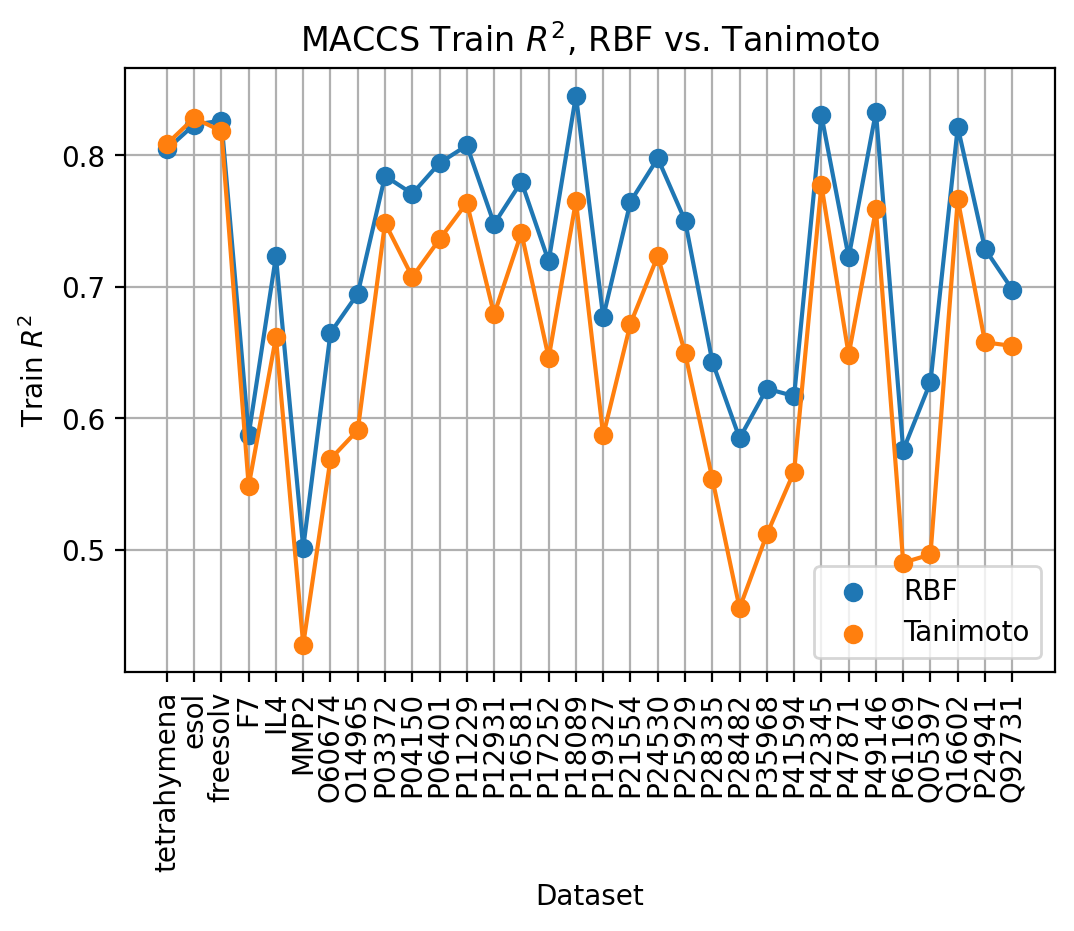

In [8]:
plot_difference(comparison_by_maccs_rbf, comparison_by_maccs_tanimoto, 'train r2', 'Train $R^2$', 'RBF', 'Tanimoto', 'MACCS Train $R^2$, RBF vs. Tanimoto', 'maccs_train')

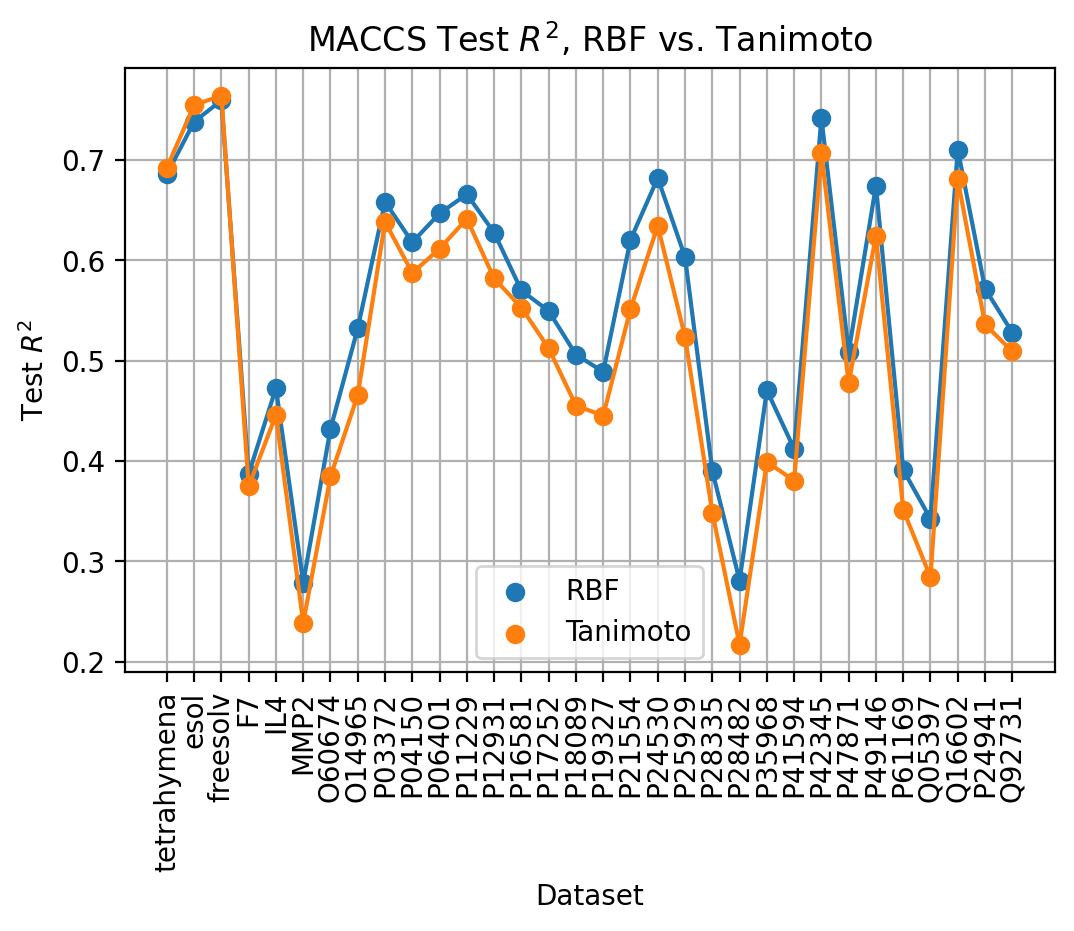

In [9]:
plot_difference(comparison_by_maccs_rbf, comparison_by_maccs_tanimoto, 'test_r2', 'Test $R^2$', 'RBF', 'Tanimoto', 'MACCS Test $R^2$, RBF vs. Tanimoto', 'maccs_test')

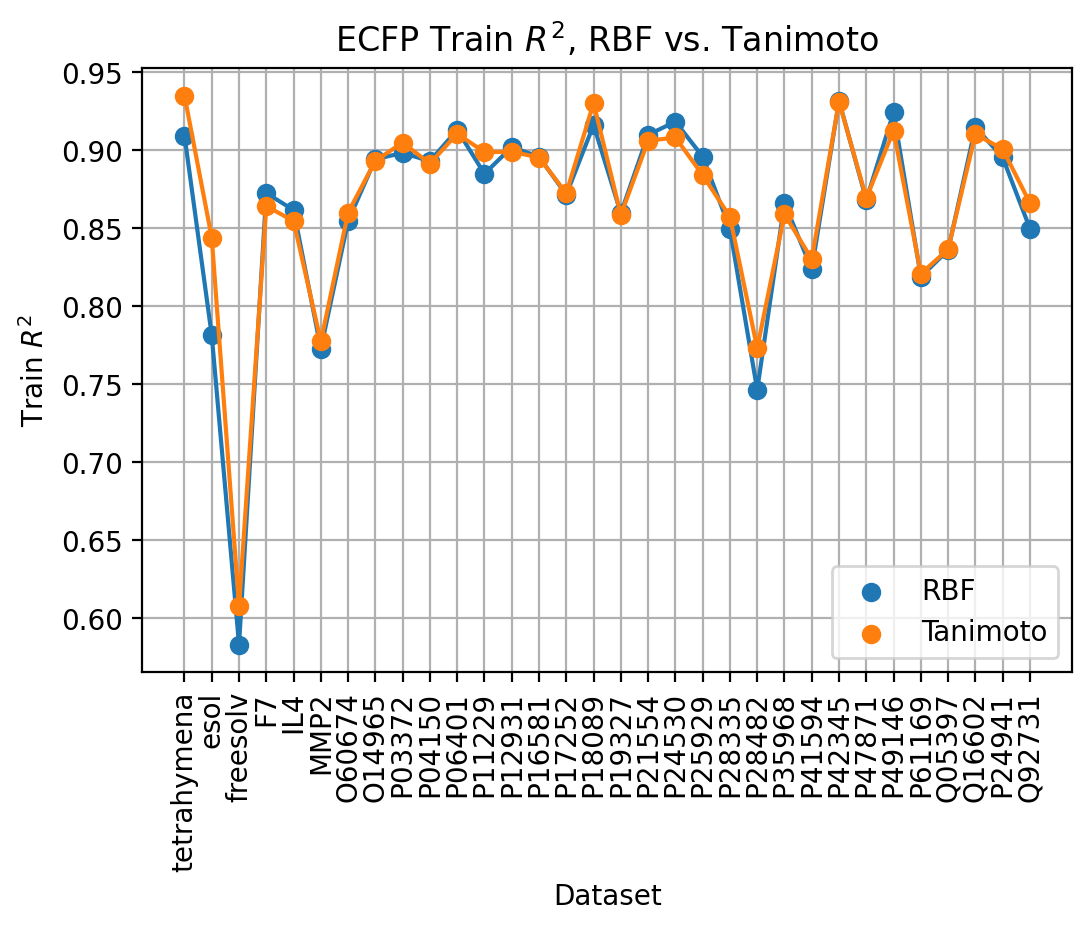

In [10]:
plot_difference(comparison_by_ecfp_rbf, comparison_by_ecfp_tanimoto, 'train r2', 'Train $R^2$', 'RBF', 'Tanimoto', 'ECFP Train $R^2$, RBF vs. Tanimoto', 'ecfp_train')

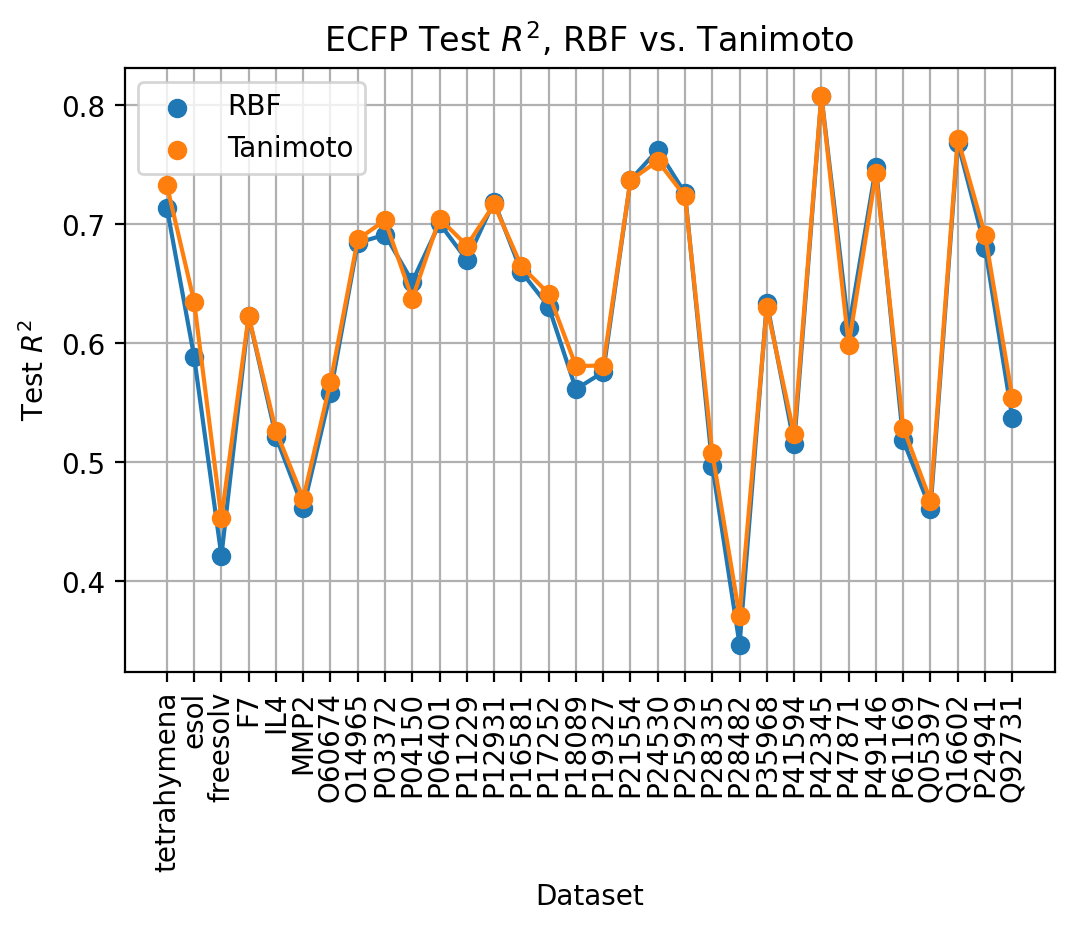

In [11]:
plot_difference(comparison_by_ecfp_rbf, comparison_by_ecfp_tanimoto, 'test_r2', 'Test $R^2$', 'RBF', 'Tanimoto', 'ECFP Test $R^2$, RBF vs. Tanimoto', 'ecfp_test')

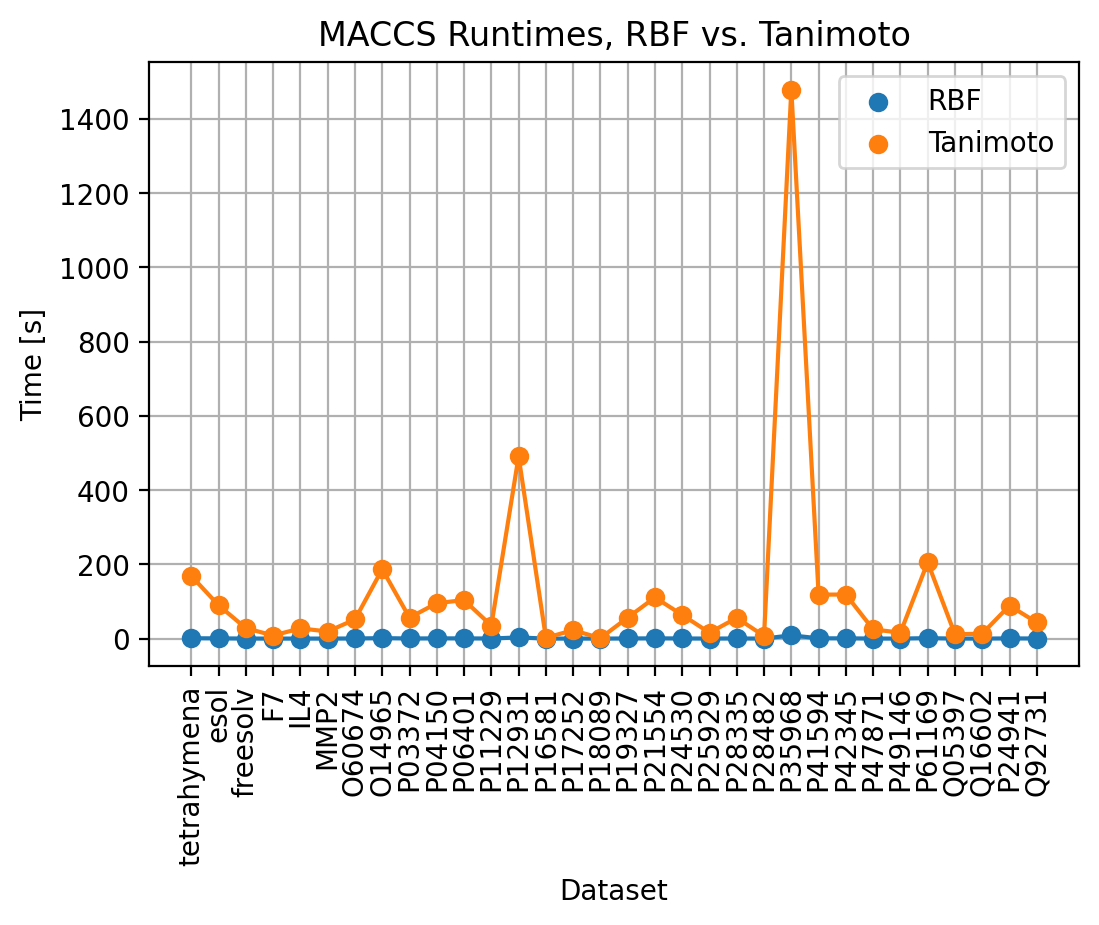

In [12]:
plot_difference(comparison_by_maccs_rbf, comparison_by_maccs_tanimoto, 'time [s]', 'Time [s]', 'RBF', 'Tanimoto', 'MACCS Runtimes, RBF vs. Tanimoto', 'maccs_times')

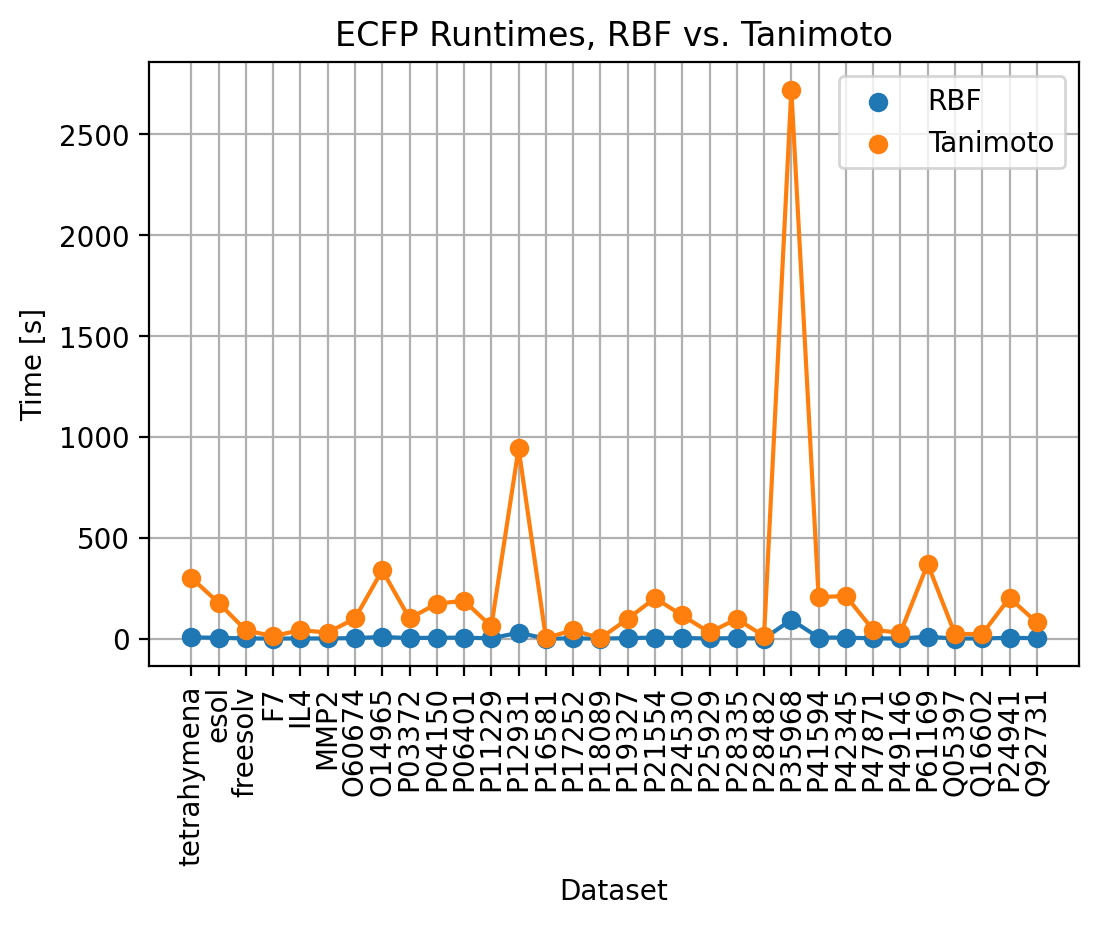

In [13]:
plot_difference(comparison_by_ecfp_rbf, comparison_by_ecfp_tanimoto, 'time [s]', 'Time [s]', 'RBF', 'Tanimoto', 'ECFP Runtimes, RBF vs. Tanimoto', 'ecfp_times')